In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# Set initial conditions and constants. 
Ro = 1e4; #cm
N = 100;  # Number of shells
bet = 0.5; rhoo = 1e7; #g cm^{-3}
G = 6.674*10**(-8);

# Set mass conditions and shell mass function.
Mtot = 4/3 * np.pi* Ro**3 * rhoo; dm = Mtot/(N);
def mm(k):
    mm = (k)*dm
    return mm

In [272]:
from scipy.linalg import solve
import warnings
warnings.filterwarnings('ignore')

# Define and initialize r, u and rho, vectors of study.
rr = np.ones(N+1);
rho = rhoo*np.ones(N+1);
uu = np.zeros(N+1);

for ii in range(N):
    if (ii == 0):
        rr[ii] = 0;
        rr[ii+1] = (3*dm/(4*np.pi*rhoo))**(1/3);
    else:
        rr[ii+1] = (3*dm/(4*np.pi*rhoo) + rr[ii]**3)**(1/3);
rin = rr; rhoin = rho;

# Set timing integration variables.
dt = 0.001; TF = 0.7;
ncounts = int(0.5/dt) + int((TF-0.6)/0.0001)

# Define vectors to store total radius, density and time.
Rfi = np.zeros(ncounts+2); Rfi[0] = rr[-1];
Rhend = np.zeros(ncounts+2); Rhend[0] = rho[-1];
time = np.zeros(ncounts+2);

# Define marker variables.
ii = 0; s = 0; t = 0;

# Define storing times and vectors for those storings.
ts = [0, 0.5816, 0.6374, 0.6598, 0.6623, 0.6638, 0.6641]
densities = list(); radius = list();

#Integrate the system.
while (t < TF and np.all(rr>=0) ):
    # Change dt once the steepness is high.
    if (t >= 0.6):
        dt = 0.0001
    # Store density and radius if the time is the desired one.
    if (t in ts):
        dens = rho;
        dens[0] = dens[1];
        densities.append(dens)
        radius.append(rr[:])
        
    # Initialize the corrections to enter the while.
    delr = rr*np.ones(N+1); delu = np.ones(N+1); delh = rho*np.ones(N+1);  
    # Store previous step variables
    rold = rr; uold = uu; rhold = rho;
    
    # Keep correction until delta is small enough.
    while (np.any(delr/rr > 1e-4) and np.any(delu/uu > 1e-4) and np.any(delh/rho > 1e-4) and np.all(rr>=0) ):
        # Reinitialize the corrections again to zero.
        delr = np.zeros(N+1); delu = np.zeros(N+1); delh = rho*np.zeros(N+1);
        
        # Compute for all the matrix for each shell and obtain corrections.
        for kk in range(1,N+1):
            M = np.zeros((3,3))
            # Derivative computation and Matrix creation.
            F1ri = -4*np.pi*rr[kk]**2/dm; F1ui = 0; F1rhi = -1/rho[kk]**2; F1ro = 4*np.pi*rr[kk-1]**2/dm;
            M[0,0] = F1rhi; M[0,1] = F1ui; M[0,2] = F1ri;
            F2ri = -2*bet*G*mm(kk)/rr[kk]**3; F2ui = 1/dt; F2rhi = 0; F2ro = 0;
            M[1,0] = F2rhi; M[1,1] = F2ui; M[1,2] = F2ri;
            F3ri = 1/dt; F3ui = -bet; F3rhi = 0; F3ro = 0;
            M[2,0] = F3rhi; M[2,1] = F3ui; M[2,2] = F3ri;
            
            # Fucntion computation
            Fi1 = 1/rho[kk] - (4/3) * np.pi * (rr[kk]**3 - rr[kk-1]**3)/dm;
            Fi2 = (uu[kk] - uold[kk])/dt - (1 - bet)*(-G*mm(kk)/(rold[kk]**2)) - bet* (-G*mm(kk)/rr[kk]**2);
            Fi3 = (rr[kk] - rold[kk])/dt - (1 - bet)*uold[kk] - bet*uu[kk];
            Fi = np.ones(3);
            Fi[0] = -Fi1 - delr[kk-1]*F1ro; Fi[1] = -Fi2 - delr[kk-1]*F2ro; Fi[2] = -Fi3 - delr[kk-1]*F3ro; 

            # Delta computation
            sol = solve(M, Fi);
            delh[kk] = sol[0]; delu[kk] = sol[1]; delr[kk] = sol[2];

        # Update of the variables with the found delta correction.
        rr = rr + delr;
        rho = rho + delh;
        uu = uu + delu;

    # Store the total final radius and density
    Rfi[ii] = rr[-1]; Rhend[ii] = rho[-1];
    
    # Get the time to shrink the radius to 1% of the initial radius.
    if (rr[-1] <= 0.01*Ro and s == 0):
        s = 1;
        print('The time elapsed to shrink the radius of the sphere to 1%% of its initial radius is t=%s' % t)

    # Next step, update time and store it. Update iteration.
    t = round(t,5); time[ii] = t;
    t += dt; ii += 1;

The time elapsed to shrink the radius of the sphere to 1% of its initial radius is t=0.664


The R at which the error is higher than 5% is R = 75.47067141289655 for t=1e-5 s
The time at which the error is higher than 5% is t = 0.6641099999997087 for t=1e-5 s
The R at which the error is higher than 5% is R = 354.88344333083666 for t=1e-4 s
The time at which the error is higher than 5% is t = 0.6622999999999936 for t=1e-4 s
The R at which the error is higher than 5% is R = 1616.855602321663 for t=1e-3 s
The time at which the error is higher than 5% is t = 0.6440000000000005 for t=1e-3 s


(0, 10)

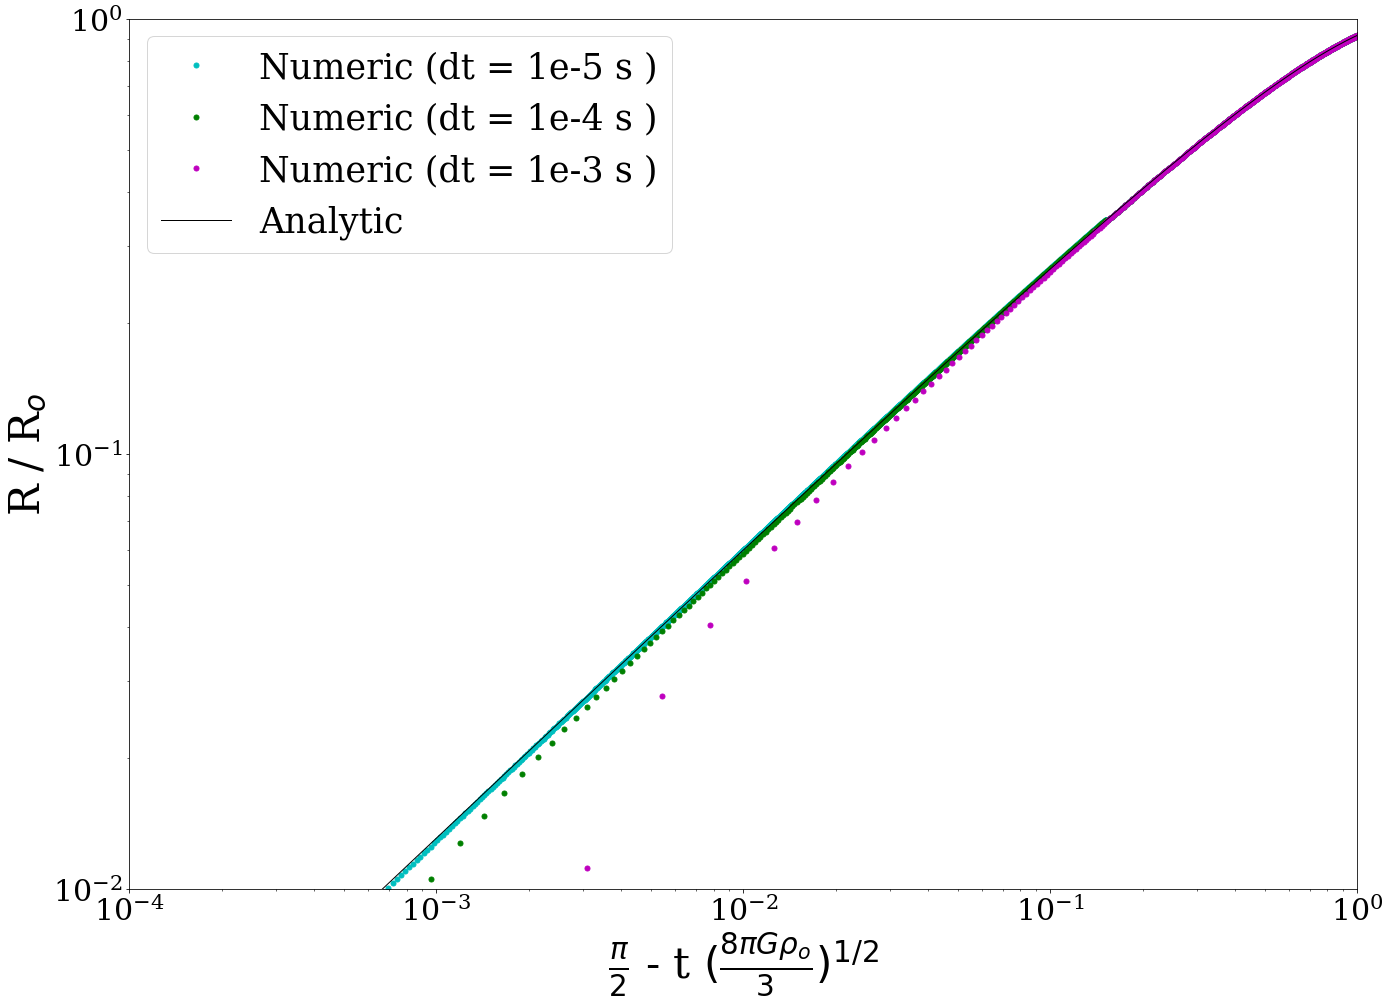

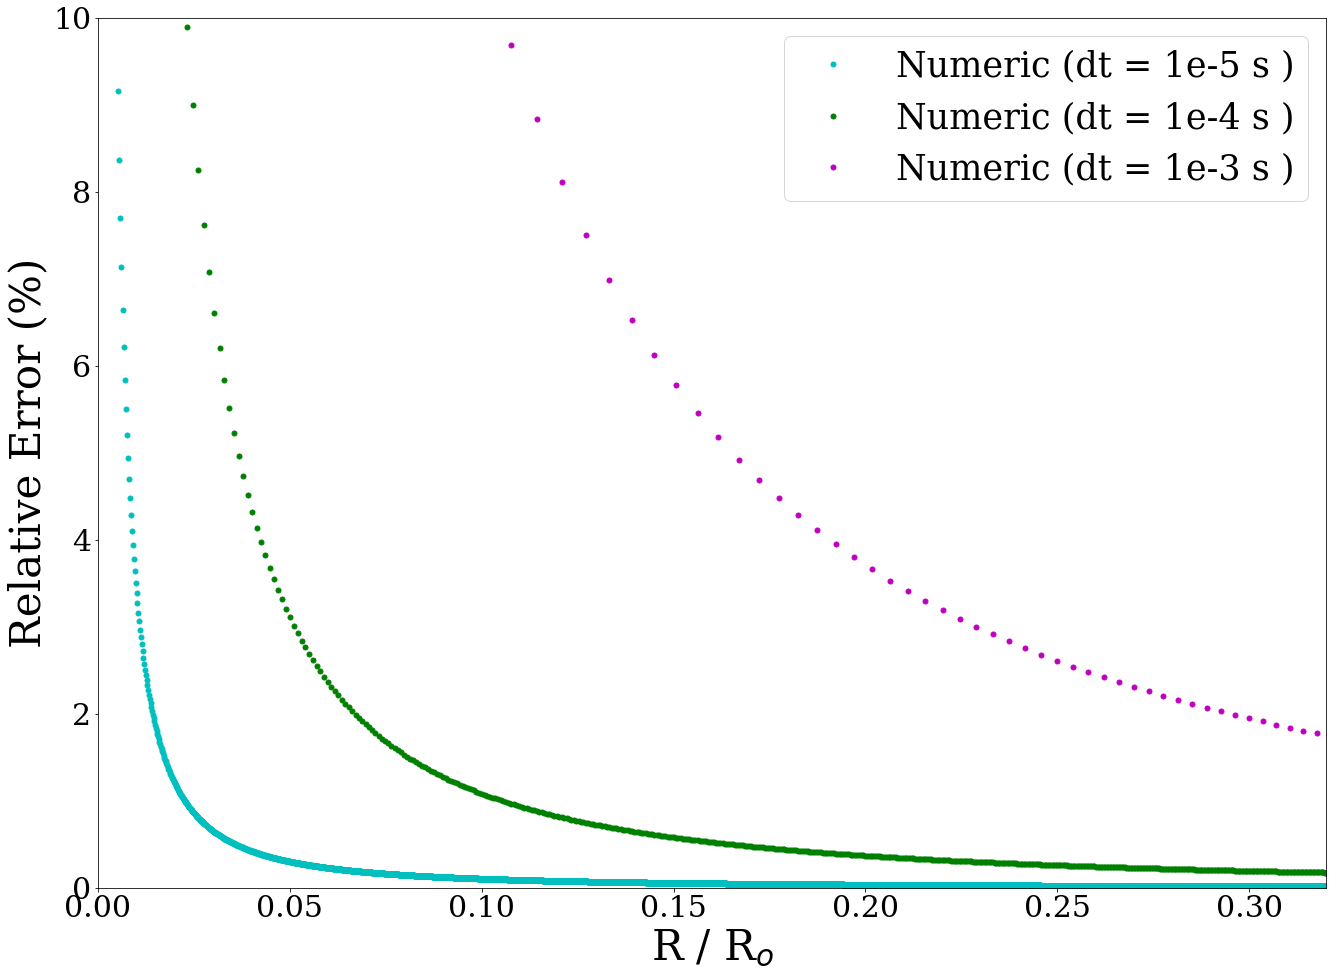

In [255]:
plt.figure(figsize=(22,16))
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.pyplot import cm
rc("text", usetex=False) # allow tex rendering
rc("font", family="serif", weight="normal", size="18")
rc("axes", labelsize="18")

# Normalize radius and store time in function of the dt.
eps = Rfi/Ro;
time3 = time
# Compute the analytic time term with the numerical solution
newt = np.pi/2*np.ones(len(time)) - time*(8*np.pi*G*rhoo/3)**(1/2)
tanalytic = (1-eps)**(1/2) * eps**(1/2) + np.arcsin((1-eps)**(1/2));
tanalytic = np.pi/2*np.ones(len(tanalytic)) - tanalytic

# Plot the analytic and numerical solutions for different dt together.
plt.loglog(newt1,eps1, '.c', markersize=10, label='Numeric (dt = 1e-5 s )')
plt.loglog(newt,eps, '.g', markersize=10, label='Numeric (dt = 1e-4 s )')
plt.loglog(newt0,eps0, '.m', markersize=10, label='Numeric (dt = 1e-3 s )')
plt.loglog(tanalytic1, eps1,'k', linewidth=1, label='Analytic' );
plt.xlabel(r"$\frac{\pi}{2}$ - t $(\frac{8 \pi G \rho_o}{3})^{1/2}$", fontsize=42);
plt.ylabel(r"R / R$_o$", fontsize=42); plt.legend(fontsize = 35)
plt.tick_params(labelsize=30)
plt.xlim(0.0001,1); plt.ylim(0.01,1)

# Print the time and R at which error becomes significant for dt = 1e-5
sip = 100*abs(tanalytic1-newt1)/tanalytic1;
msm = 0;
for tt in sip: 
    if (tt >= 5 and msm == 0):
        msm = 1
        kk = Ro *eps1[np.where(sip == tt)[0][0]]
        ss = time1[np.where(sip == tt)[0][0]]
        print('The R at which the error is higher than 5%% is R = %s for t=1e-5 s' % kk)
        print('The time at which the error is higher than 5%% is t = %s for t=1e-5 s' % ss)

# Print the time and R at which error becomes significant for dt = 1e-4
sip = 100*abs(tanalytic-newt)/tanalytic;
msm = 0
for tt in sip : 
    if (tt >= 5 and msm == 0):
        msm = 1
        kk = Ro * eps[np.where(sip == tt)[0][0]]
        ss = time3[np.where(sip == tt)[0][0]]
        print('The R at which the error is higher than 5%% is R = %s for t=1e-4 s' % kk)
        print('The time at which the error is higher than 5%% is t = %s for t=1e-4 s' % ss)
    
# Print the time and R at which error becomes significant for dt = 1e-3
sip = 100*abs(tanalytic0-newt0)/tanalytic0;
msm = 0;
for tt in sip : 
    if (tt >= 5 and msm == 0):
        msm = 1
        kk = Ro * eps0[np.where(sip == tt)[0][0]]
        ss = time0[np.where(sip == tt)[0][0]]
        print('The R at which the error is higher than 5%% is R = %s for t=1e-3 s' % kk)
        print('The time at which the error is higher than 5%% is t = %s for t=1e-3 s' % ss)

# Print the different Relative error for the different integrations $dt$
plt.figure(figsize=(22,16))
plt.plot(eps1, 100*abs(tanalytic1-newt1)/tanalytic1, '.c', markersize=10, label='Numeric (dt = 1e-5 s )')
plt.plot(eps, 100*abs(tanalytic-newt)/tanalytic, '.g', markersize=10, label='Numeric (dt = 1e-4 s )')
plt.plot(eps0, 100*abs(tanalytic0-newt0)/tanalytic0,  '.m', markersize=10, label='Numeric (dt = 1e-3 s )')
plt.ylabel("Relative Error (%)", fontsize=42);
plt.xlabel(r"R / R$_o$", fontsize=42); plt.legend(fontsize = 35)
plt.tick_params(labelsize=30); plt.xlim(0.0001,0.32); plt.ylim(0,10)

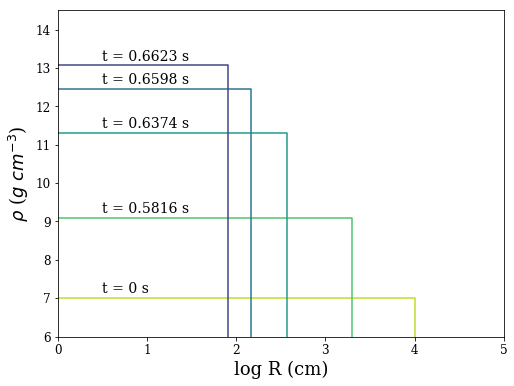

In [273]:
# Print the stored densities on different times to see they remain constant.

plt.figure(figsize=(8,6))
from matplotlib import rc
from matplotlib.pyplot import cm
rc("text", usetex=False) # allow tex rendering
rc("font", family="serif", weight="normal", size="18")
rc("axes", labelsize="18")
color=iter(cm.get_cmap('viridis')(np.linspace(0.9,0.2,len(densities))))

for i in range(len(densities)):
    r = np.log10(radius[i]);r = r.tolist(); r[0] = 0; r = r + [r[-1]]
    den = densities[i]; den = den.tolist(); den = den + [1]; 

    c = next(color)
    plt.plot(r, np.log10(den), color = c, label = str(ts[i]), linewidth = 1.5);
    plt.text(0.5,np.log10(den[1]) + 0.13,'t = ' + str(ts[i]) + ' s', fontsize = 14)

plt.xlim(0,5); plt.ylim(6,14.5);
plt.xlabel(r'log R (cm)'); plt.ylabel(r"log $\rho$ (g  cm$^{-3}$)");
plt.tick_params(labelsize = 12)
plt.ylabel(r"$\rho$ ($g \ cm^{-3}$)", fontsize=18);

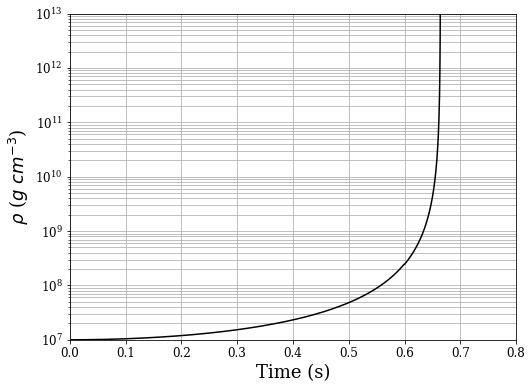

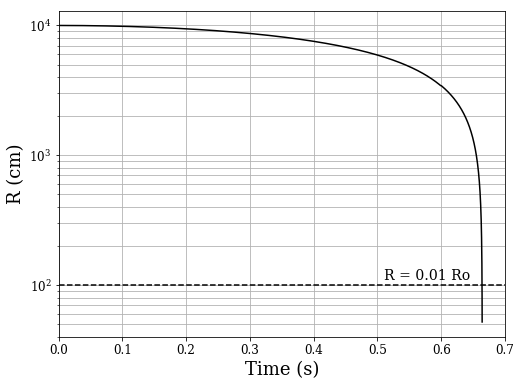

In [283]:
# Print the total radius and density over time.
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("text", usetex=False) # allow tex rendering
rc("font", family="serif", weight="normal", size="18")
rc("axes", labelsize="18")

plt.figure(figsize=(8,6))
plt.semilogy(time[:ii-2], Rhend[:ii-2], 'k')
plt.xlim(0,0.8); plt.grid(True,which="both",ls="-")
plt.ylim(0,1*10**(13)); plt.xlabel('Time (s)', fontsize=18)
plt.ylabel(r"$\rho$ ($g \ cm^{-3}$)", fontsize=18);
plt.tick_params(labelsize = 12)

plt.figure(figsize=(8,6))
plt.semilogy(time[:ii-2], Rfi[:ii-2], 'k');
plt.plot(np.linspace(0,0.8,15), 0.01*Ro*np.ones(15), '--k')
plt.xlim(0,0.7); plt.grid(True,which="both",ls="-")
plt.text(0.51,1.1*10**2,'R = 0.01 Ro', fontsize = 14)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel("R (cm)", fontsize=18);
plt.tick_params(labelsize = 12)

For bet= 0 the time elapsed to shrink is t=0.6652
The R at which the error is higher than 5% is R = 1709.7625047576475 for bet=0
The time at which the error is higher than 5% is t = 0.6443 for bet=0
For bet = 0 the time of collapse is t = 0.6656
For bet = 0 the maximum density of collapse is den = 6.275743E+13
For bet = 0 the minimum radius of collapse is r = 20.238361545243567
For bet= 0.25 the time elapsed to shrink is t=0.6646
The R at which the error is higher than 5% is R = 1041.9280809637678 for bet=0.25
The time at which the error is higher than 5% is t = 0.655 for bet=0.25
For bet = 0.25 the time of collapse is t = 0.6649
For bet = 0.25 the maximum density of collapse is den = 3.794421E+13
For bet = 0.25 the minimum radius of collapse is r = 36.08939907813706
For bet= 0.5 the time elapsed to shrink is t=0.664
The R at which the error is higher than 5% is R = 354.88344333083666 for bet=0.5
The time at which the error is higher than 5% is t = 0.6623 for bet=0.5
For bet = 0.5 the 

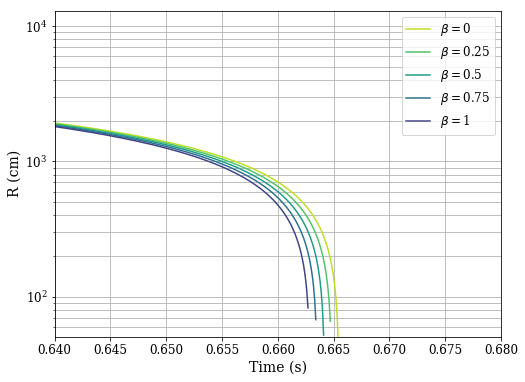

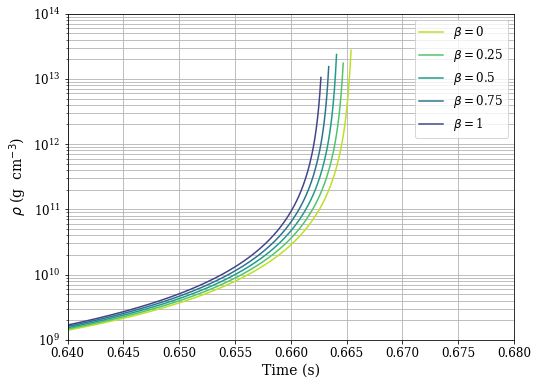

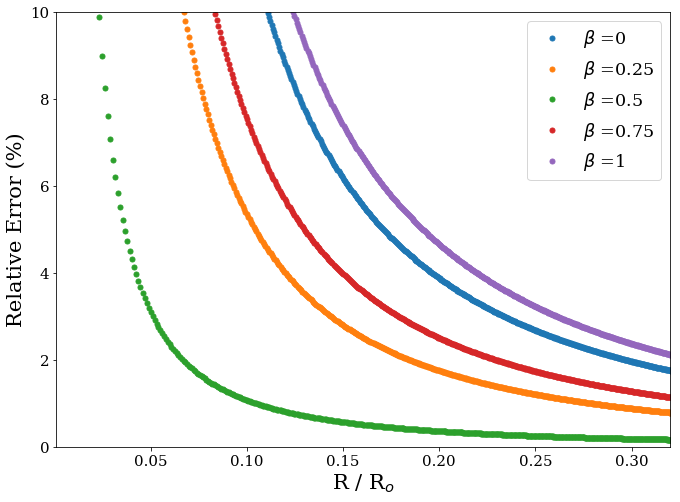

In [16]:
from scipy.linalg import solve
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import cm
from matplotlib import rc
rc("text", usetex=False) # allow tex rendering
rc("font", family="serif", weight="normal", size="18")
rc("axes", labelsize="18")
color=iter(cm.get_cmap('viridis')(np.linspace(0.9,0.2,5)))
plt.figure(2, figsize=(8,6));
plt.figure(1, figsize=(8,6))

# Integrate for different betas.
for bet in [0,0.25,0.5,0.75,1]:
    c = next(color)
    
    # Define and initialize r, u and rho, vectors of study.
    rr = np.ones(N+1); rho = rhoo*np.ones(N+1); uu = np.zeros(N+1);
    for ii in range(N):
        if (ii == 0):
            rr[ii] = 0;
            rr[ii+1] = (3*dm/(4*np.pi*rhoo))**(1/3);
        else:
            rr[ii+1] = (3*dm/(4*np.pi*rhoo) + rr[ii]**3)**(1/3);
    rin = rr; rhoin = rho;
    
    # Set timing integration variables.
    dt = 0.001; TF = 0.7; 
    ncounts = int(0.5/dt) + int((TF-0.5)/0.0001)
    
    # Define vectors to store total radius, density and time.
    Rfi = np.zeros(ncounts+2); Rfi[0] = rr[-1];
    Rhend = np.zeros(ncounts+2); Rhend[0] = rho[-1];
    time = np.zeros(ncounts+2);
    
    # Define initial time, iteration and marker variable.
    ii = 0; s = 0;t = 0;
    
    # Integrate the system.
    while (t < TF and np.all(rr>=0) ):
        # Change dt once the steepness is high.
        if(t>=0.6):
            dt = 0.0001
            
        # Initialize the corrections to enter the while.
        delr = rr*np.ones(N+1); delu = np.ones(N+1); delh = rho*np.ones(N+1);   
        
        # Store previous step variables.
        rold = rr; uold = uu; rhold = rho;
        
        # Keep correction until delta is small enough.s
        while (np.any(delr/rr > 1e-6) and np.any(delu/uu > 1e-6) and np.any(delh/rho > 1e-6) and np.all(rr>=0) ):
            # Reinitialize the corrections again to zero.
            delr = np.zeros(N+1); delu = np.zeros(N+1); delh = rho*np.zeros(N+1);
            
            # Compute for all the matrix for each shell and obtain corrections.
            for kk in range(1,N+1):
                M = np.zeros((3,3))
                # Derivative computation and Matrix creation.
                F1ri = -4*np.pi*rr[kk]**2/dm; F1ui = 0; F1rhi = -1/rho[kk]**2; F1ro = 4*np.pi*rr[kk-1]**2/dm;
                M[0,0] = F1rhi; M[0,1] = F1ui; M[0,2] = F1ri;
                F2ri = -2*bet*G*mm(kk)/rr[kk]**3; F2ui = 1/dt; F2rhi = 0; F2ro = 0;
                M[1,0] = F2rhi; M[1,1] = F2ui; M[1,2] = F2ri;
                F3ri = 1/dt; F3ui = -bet; F3rhi = 0; F3ro = 0;
                M[2,0] = F3rhi; M[2,1] = F3ui; M[2,2] = F3ri;


                # Fucntion computation
                Fi1 = 1/rho[kk] - (4/3) * np.pi * (rr[kk]**3 - rr[kk-1]**3)/dm;
                Fi2 = (uu[kk] - uold[kk])/dt - (1 - bet)*(-G*mm(kk)/(rold[kk]**2)) - bet* (-G*mm(kk)/rr[kk]**2);
                Fi3 = (rr[kk] - rold[kk])/dt - (1 - bet)*uold[kk] - bet*uu[kk];
                Fi = np.ones(3);
                Fi[0] = -Fi1 - delr[kk-1]*F1ro; Fi[1] = -Fi2 - delr[kk-1]*F2ro; Fi[2] = -Fi3 - delr[kk-1]*F3ro; 

                # Delta computation
                sol = solve(M, Fi);
                delh[kk] = sol[0]; delu[kk] = sol[1]; delr[kk] = sol[2];
                
            # Update of the variables with the found delta correction.
            rr = rr + delr;
            rho = rho + delh;
            uu = uu + delu;

        # Store the total radius and density.
        Rfi[ii] = rr[-1];
        Rhend[ii] = rho[-1];
        
        # Print the time at which R = 0.01Ro
        if (rr[-1] <= 0.01*Ro and s == 0):
            s = 1;
            print('For bet= %s the time elapsed to shrink is t=%s' % (bet, t))

        # Update time, iteration and store time.
        t = round(t,4); time[ii] = t;
        t += dt; ii += 1;
        
    # Plot density and radius over time.    
    plt.figure(1)
    plt.semilogy(time[:ii-2], Rhend[:ii-2], color = c, label = r'$\beta = $' + str(bet))
    plt.figure(2)
    plt.semilogy(time[:ii-2], Rfi[:ii-2],  color = c, label = r'$\beta = $' + str(bet))

    # Get the analytic time term to compare analytic and numerical solution.
    eps = Rfi/Ro;
    newt = np.pi/2*np.ones(len(time)) - time*(8*np.pi*G*rhoo/3)**(1/2)
    tanalytic = (1-eps)**(1/2) * eps**(1/2) + np.arcsin((1-eps)**(1/2));
    tanalytic = np.pi/2*np.ones(len(tanalytic)) - tanalytic
    
    # Obtain the R and time at which error becomes significant.
    sip = 100*abs(tanalytic-newt)/tanalytic;
    msm = 0;
    for tt in sip: 
        if (tt >= 5 and msm == 0):
            msm = 1
            kk = Ro *eps[np.where(sip == tt)[0][0]]
            ss = time[np.where(sip == tt)[0][0]]
            print('The R at which the error is higher than 5%% is R = %s for bet=%s' % (kk,bet))
            print('The time at which the error is higher than 5%% is t = %s for bet=%s' % (ss,bet))

    # Print values of collapse of the beta.
    print('For bet = %s the time of collapse is t = %s' %(bet, time[ii-1]))
    print('For bet = %s the maximum density of collapse is den = %E' %(bet, Rhend[ii-2]))
    print('For bet = %s the minimum radius of collapse is r = %s' %(bet, Rfi[ii-2]))
    
    # Plot relative error
    plt.figure(3,figsize=(11,8))
    plt.plot(eps, 100*abs(tanalytic-newt)/tanalytic, '.', markersize=10, label=r'$\beta$ =' + str(bet))
    plt.ylabel("Relative Error (%)", fontsize=21); plt.xlabel(r"R / R$_o$", fontsize=21); plt.legend(fontsize = 17.5)
    plt.tick_params(labelsize=15); plt.xlim(0.001,0.32); plt.ylim(0,10)

# Figure custmoization
plt.figure(1)
plt.xlim(0.64,0.68); plt.grid(True,which="both",ls="-")
plt.ylim(1*10**(9),1*10**(14)); plt.xlabel('Time (s)', fontsize=14)
plt.ylabel(r"$\rho$ (g  cm$^{-3}$)", fontsize=14); plt.tick_params(labelsize = 12); plt.legend(fontsize=12)

plt.figure(2)
plt.xlim(0.64,0.68); plt.grid(True,which="both",ls="-")
plt.ylim(0,1.3*10**(4));  plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('R (cm)', fontsize=14); plt.tick_params(labelsize = 12); plt.legend(fontsize=12)
